In [1]:
import random
import string

import matplotlib.pyplot as plt

random.seed(0)
import numpy as np
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])

tickers = np.array([rands(5) for _ in range(N)])
tickers

array(['MYNBI', 'QPMZJ', 'PLSGQ', 'EJEYD', 'TZIRW', 'ZTEJD', 'XCVKP',
       'RDLNK', 'TUGRP', 'OQIBZ', 'RACXM', 'WZVUA', 'TPKHX', 'KWCGS',
       'HHZEZ', 'ROCCK', 'QPDJR', 'JWDRK', 'RGZTR', 'SJOCT', 'ZMKSH',
       'JFGFB', 'TVIPC', 'CVYEE', 'BCWRV', 'MWQIQ', 'ZHGVS', 'NSIOP',
       'VUWZL', 'CKTDP', 'SUKGH', 'AXIDW', 'HLZFK', 'NBDZE', 'WHBSU',
       'RTVCA', 'DUGTS', 'DMCLD', 'BTAGF', 'WDPGX', 'ZBVAR', 'NTDIC',
       'HCUJL', 'NFBQO', 'BTDWM', 'GILXP', 'SFWVG', 'YBZVF', 'FKQID',
       'TOVFA', 'PVNSQ', 'JULMV', 'IERWA', 'OXCKX', 'BRIEH', 'YPLTJ',
       'VLSUT', 'EWJMX', 'NUCAT', 'GWKFH', 'HUOMW', 'VSNBM', 'WSNYV',
       'WBFOC', 'IWFOQ', 'PRTYA', 'BPKJO', 'BZZNG', 'RUCXE', 'AMVNK',
       'AGAWY', 'AVQTD', 'GDTUG', 'JIWFD', 'PMUCA', 'IOZZD', 'IEUQU',
       'ULDEI', 'ABBGV', 'IRKLS', 'BXWTU', 'PWUOU', 'NLRFG', 'MSJAE',
       'EIKKZ', 'LWCKY', 'TBBIF', 'ESJLM', 'REJDP', 'XHBJF', 'QXCJM',
       'KJNDD', 'RPPKZ', 'ZKDPD', 'WPNBJ', 'KXVEF', 'USMZU', 'CCZCG',
       'XHBMA', 'DMR

In [2]:

import pandas as pd

M = 500
df = pd.DataFrame({'Momentum':np.random.randn(M) / 200 + .03,
              'Value': np.random.randn(M) / 200 + .08,
              'ShortInterest':np.random.randn(M) / 200 - .02},
             index=tickers[:M])

df

,Momentum,Value,ShortInterest
MYNBI,0.037228,0.086672,-0.019905
QPMZJ,0.023851,0.075882,-0.029264
PLSGQ,0.026855,0.075240,-0.024298
EJEYD,0.030713,0.077911,-0.026870
TZIRW,0.042374,0.073285,-0.015850
...,...,...,...
JPHKQ,0.025986,0.078870,-0.013585
VACPK,0.033287,0.077528,-0.022150
MHNBS,0.031227,0.086890,-0.025884
YBNCI,0.038978,0.079609,-0.022668


In [9]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = pd.Series(ind_names[sampler], index=tickers, name='industry')
# industries
ind_names[sampler] #INTERESTING way to index numpy arrays!

array(['FINANCIAL', 'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL', 'TECH',
       'TECH', 'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL', 'TECH',
       'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL', 'TECH', 'FINANCIAL',
       'TECH', 'FINANCIAL', 'FINANCIAL', 'FINANCIAL', 'TECH', 'TECH',
       'TECH', 'TECH', 'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL', 'TECH',
       'TECH', 'FINANCIAL', 'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL',
       'TECH', 'FINANCIAL', 'TECH', 'TECH', 'TECH', 'FINANCIAL', 'TECH',
       'TECH', 'FINANCIAL', 'TECH', 'TECH', 'FINANCIAL', 'TECH', 'TECH',
       'FINANCIAL', 'TECH', 'TECH', 'TECH', 'FINANCIAL', 'TECH', 'TECH',
       'FINANCIAL', 'FINANCIAL', 'TECH', 'TECH', 'TECH', 'FINANCIAL',
       'TECH', 'TECH', 'TECH', 'FINANCIAL', 'TECH', 'TECH', 'TECH',
       'TECH', 'TECH', 'FINANCIAL', 'FINANCIAL', 'TECH', 'FINANCIAL',
       'TECH', 'FINANCIAL', 'TECH', 'TECH', 'TECH', 'FINANCIAL', 'TECH',
       'TECH', 'TECH', 'TECH', 'FINANCIAL', 'FINANCIAL', 'FINANCIAL',
       'TECH

In [10]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.030491,0.080135,-0.019399
TECH,0.030063,0.079707,-0.020076


In [16]:
## TRANSORMATION functions

def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)
df_stand

df_stand.groupby(industries).agg(['mean','std'])

Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL -1.042321e-15  1.0 -2.725994e-16  1.0  5.020785e-16  1.0
TECH       1.134358e-15  1.0 -1.726892e-15  1.0 -5.237356e-16  1.0

In [20]:
## RANK
ind_rank = by_industry.rank(ascending=False) #.sum(axis=1)
ind_rank

,Momentum,Value,ShortInterest
MYNBI,24.0,22.0,128.0
QPMZJ,203.0,185.0,219.0
PLSGQ,196.0,233.0,225.0
EJEYD,129.0,171.0,251.0
TZIRW,2.0,211.0,48.0
...,...,...,...
JPHKQ,181.0,140.0,27.0
VACPK,78.0,185.0,184.0
MHNBS,122.0,20.0,245.0
YBNCI,13.0,138.0,197.0


In [21]:
ind_rank.groupby(industries).agg(['min','max']) #MIN and MAX ranks (of Mom, Value, Short Interest) by SECTOR

Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  224.0   1.0  224.0           1.0  224.0
TECH           1.0  276.0   1.0  276.0           1.0  276.0

In [26]:
## ------------------ RANK AND STANDARDIZE ------------------------

by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,Value,ShortInterest
MYNBI,1.365585,1.396445,-0.239170
QPMZJ,-1.396445,-1.118699,-1.643331
PLSGQ,-0.720384,-1.183935,-1.083708
EJEYD,0.119020,-0.407174,-1.409447
TZIRW,1.705052,-1.519888,0.995257
...,...,...,...
JPHKQ,-1.056978,-0.424334,1.319294
VACPK,0.757969,-0.582571,-0.570043
MHNBS,0.206719,1.484617,-1.334276
YBNCI,1.572316,0.006264,-0.732912


In [29]:
ranked = by_industry.rank()
ranked.apply(zscore) #THIS really does the Z Score (NORM) of the rank

,Momentum,Value,ShortInterest
MYNBI,0.994802,1.021635,-0.400507
QPMZJ,-1.406740,-1.165244,-1.621403
PLSGQ,-0.615170,-1.111578,-1.004247
EJEYD,0.283731,-0.279760,-1.353074
TZIRW,1.289963,-1.514072,0.672807
...,...,...,...
JPHKQ,-1.111578,-0.561505,0.954553
VACPK,0.967969,-0.467590,-0.454173
MHNBS,0.377646,1.746122,-1.272576
YBNCI,1.840037,0.162983,-0.628587


In [45]:
## ---------------------- FACTORS -------------------------

from numpy.random import rand

f1, f2, f3 = np.random.rand(3,1000) #UNPACKS this to 3 rows!

ticker_subset = tickers.take(np.random.permutation(N)[:1000])
np.random.permutation(5), ticker_subset

(array([0, 3, 4, 1, 2]),
 array(['OUEPK', 'WGFWV', 'AZQWM', 'MMBEO', 'YAVYP', 'BRIEH', 'FYNCS',
        'XARMY', 'HFHAZ', 'OWEPZ', 'QPMZJ', 'QLRAT', 'KEFPC', 'GOGSW',
        'CKTDP', 'KVXCL', 'HUOMW', 'BYXPQ', 'EWKWS', 'WDFXN', 'FUEHJ',
        'HUWLU', 'NUCAT', 'PRTYA', 'BCHEB', 'RUCXE', 'TUKUD', 'RCCTX',
        'UTDJE', 'XNYGJ', 'LAPUB', 'BCWRV', 'GAEHO', 'WIEAP', 'ICJLE',
        'OWKMF', 'OIHMM', 'CSEAX', 'RBFPF', 'RPOWD', 'ZALLY', 'WXTFM',
        'NFAZE', 'AEGXS', 'QEZTQ', 'ULCHO', 'XWPSF', 'JPMRA', 'CJUVE',
        'JYQDL', 'LGJNC', 'XKEKS', 'SXYQF', 'YOHNH', 'PKINJ', 'TMWGK',
        'BZZNG', 'CSQBE', 'FCVKF', 'PPYNA', 'LFANS', 'TIGCN', 'FXZVR',
        'VMIXC', 'YAFSA', 'ZCUSM', 'QBRWX', 'QKECE', 'XXRJH', 'NMZMB',
        'IRFOM', 'ISDQC', 'EAKTG', 'OJLUP', 'VESRG', 'VQGXK', 'KXAGT',
        'FZFPV', 'JMTQA', 'LXPKD', 'OKMQB', 'KBCTA', 'XKBBP', 'KWWIZ',
        'FAOZI', 'MLOBR', 'XDXAJ', 'UEQCN', 'NIPNV', 'MUVNQ', 'UIIMD',
        'NIXUY', 'ZMKSH', 'GPCGD', 'PYNAO', 'VTOQL',

In [70]:
port = pd.Series(.7 * f1 - 1.2 * f2 + .3 * f3 + rand(1000))
# port, rand(1000)
# print(port[:5])
factors = pd.DataFrame({'f1':f1, 'f2':f2, 'f3':f3}, index=ticker_subset)
factors.head(5)

,f1,f2,f3
OUEPK,0.509781,0.988242,0.167851
WGFWV,0.345704,0.524944,0.893101
AZQWM,0.382727,0.109738,0.456985
MMBEO,0.552851,0.649644,0.968131
YAVYP,0.311825,0.979261,0.787610


In [72]:
# from pandas.stats.api import ols #Also not working, deprecated too?
# res = pd.ols(port, factors).beta #Not working...

import statsmodels.api as sm

# factors.corrwith(port) #Doesnt work ? why...

facts = sm.add_constant(factors) #REQUIRED a constant.
# facts = sm.add_constant(1)



model = sm.OLS(port.to_numpy(), facts.to_numpy()).fit() #NOT quite working... --- WHY is this such a pain in the ass?
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     647.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          2.65e-233
Time:                        18:13:48   Log-Likelihood:                -188.16
No. Observations:                1000   AIC:                             384.3
Df Residuals:                     996   BIC:                             404.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4573      0.029     15.937      0.000       0.401       0.514
x1             0.7087      0.031     22.507      0.000       0.647       0.771
x2            -1.1720      0.032    -36.663      0.000      -1.235      -1.109
x3             0.3247      0.032     10.046      0.000       0.261       0.388
==============================================================================
Omnibus:                     1006.942   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.852
Skew:                           0.032   Prob(JB):                     1.36e-14
Kurtosis:                       1.764   Cond. No.                         6.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
print(factors.to_numpy()[:5], port.to_numpy()[:5])

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(factors, port)
reg.coef_, reg.intercept_

[[0.50978131 0.98824192 0.16785111]
 [0.34570411 0.52494387 0.89310099]
 [0.3827266  0.10973816 0.45698463]
 [0.55285078 0.64964444 0.96813054]
 [0.3118248  0.97926059 0.78761002]] [-0.62512581  0.82296013  0.33682035  0.05444434 -0.64679726]


(array([ 0.72907484, -1.21030221,  0.29850873]), 0.4795468735775614)

In [73]:
by_ind = port.groupby(industries)

def beta_exposure(chunk , factors=None):
    reg = linear_model.LinearRegression()
    reg.fit(chunk, factors)
    return reg.coef_

by_ind.apply(beta_exposure, factors=factors)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [85]:
## ------------------ QUARTILE ------------------------
import yfinance as yf

df = yf.download('SPY')
data = df
data

px = data['Adj Close']
px
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.notnull().argmax() - 1, 0)
    index.values[first_loc] = 1 #SET the first value to 1, not NAN (DONT think the above is needed... should be FIRST no?
    return index

def trend_signal(rets, lookback, lag):
    signal = rets.rolling(lookback).sum()
    return signal.shift(lag)

signal = trend_signal(returns,100, 3)
signal

trade_friday = signal.resample('W').sum() #.resample('B', fill_method='ffill')
trade_friday

trade_rets = trade_friday.shift(1) * returns
# trade_rets.plot()
# to_index(trade_rets).plot()
trade_rets #THI shit does not WORK -- outdated pandas code...

[*********************100%***********************]  1 of 1 completed


Date
1993-01-29   NaN
1993-01-31   NaN
1993-02-01   NaN
1993-02-02   NaN
1993-02-03   NaN
              ..
2022-09-27   NaN
2022-09-28   NaN
2022-09-29   NaN
2022-09-30   NaN
2022-10-02   NaN
Name: Adj Close, Length: 9022, dtype: float64

In [88]:
## ----------------------------- NP


names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)

#EACH name corresponds to a ROW in the array...

names == 'Bob', data[names == 'Bob']

(array([ True, False, False,  True, False, False, False]),
 array([[-1.01710546,  0.47414   ,  1.59548309, -0.36531878],
        [-1.13738091, -0.01246134,  1.01523915,  0.24880554]]))

In [94]:
data[names=='Bob',:2] #ALL but last 2 columns... (w BOB row -- aka 0)

mask = (names == 'Bob') | (names == 'Will')
print(data[mask])

data[data < 0] = 0 #SET all to 0 if they are < 0 !
print(data)

data[names!='Joe'] = 7
data

[[0.         0.47414    1.59548309 0.        ]
 [0.32560031 0.425657   0.         0.        ]
 [0.         0.         1.01523915 0.24880554]
 [2.77795671 2.51502364 1.7225843  0.        ]]
[[0.         0.47414    1.59548309 0.        ]
 [0.28626668 0.18698617 0.42706075 0.31499552]
 [0.32560031 0.425657   0.         0.        ]
 [0.         0.         1.01523915 0.24880554]
 [2.77795671 2.51502364 1.7225843  0.        ]
 [0.         1.29099732 1.66466105 0.        ]
 [0.61930005 0.         0.         0.        ]]


array([[7.        , 7.        , 7.        , 7.        ],
       [0.28626668, 0.18698617, 0.42706075, 0.31499552],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.29099732, 1.66466105, 0.        ],
       [0.61930005, 0.        , 0.        , 0.        ]])

In [96]:
trades = pd.read_clipboard()

In [97]:
trades

,1,Buy,10/14/2019 15:00,MA Swing Buy,@ES.D,"$2,905.75",$0.00,1.1,$837.50,0.58%,"$1,975.00",88.76%,Unnamed: 12,$0.00 .1,$0.00 .2
0,NaN,Sell,10/18/2019 15:00,Sell#2,@ES.D,"$2,922.50",NaN,$837.50,$837.50,NaN,($250.00),48.88%,37.64%,$0.00,$0.00
1,2.0,Buy,10/21/2019 15:00,MA Swing Buy,@ES.D,"$2,943.50",$0.00,1,$725.00,0.49%,"$1,012.50",55.10%,NaN,$0.00,$0.00
2,NaN,Sell,10/25/2019 15:00,Sell#2,@ES.D,"$2,958.00",NaN,$725.00,"$1,562.50",NaN,($825.00),84.35%,39.46%,$0.00,$0.00
3,3.0,Buy,10/28/2019 15:00,MA Swing Buy,@ES.D,"$2,974.75",$0.00,1,"$1,350.00",0.91%,"$1,375.00",61.45%,NaN,$0.00,$0.00
4,NaN,Sell,11/1/2019 15:00,Sell#2,@ES.D,"$3,001.75",NaN,"$1,350.00","$2,912.50",NaN,($862.50),98.88%,60.34%,$0.00,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,115.0,Buy,9/12/2022 15:00,MA Swing Buy,@ES.D,"$4,124.50",$0.00,1,"($11,787.50)",-5.72%,$475.00,3.38%,NaN,$0.00,$0.00
228,NaN,Sell,9/16/2022 15:00,Sell#2,@ES.D,"$3,888.75",NaN,"($11,787.50)","$56,700.00",NaN,"($13,575.00)",12.72%,-83.90%,$0.00,$0.00
229,NaN,Sell,9/9/2022 15:00,Sell#2,"$4,085.50",NaN,"$3,350.00","$68,487.50",NaN,($87.50),87.86%,85.62%,$0.00,$0.00,NaN
230,115.0,Buy,9/12/2022 15:00,MA Swing Buy,"$4,124.50",$0.00,1,"($11,787.50)",-5.72%,$475.00,3.38%,NaN,$0.00,$0.00,NaN


In [121]:
df = pd.read_excel('C:\\Users\\zach\\Desktop\\Book3.xlsx', index_col=0)
pnl = df['Profit/Loss']
pnl

cpnl = pnl.reset_index().drop(columns='index')
cpnl

mask = cpnl.index % 2 != 0

fpnl = cpnl[mask]
fpnl

fpnl = fpnl.reset_index().drop(columns='index')
fpnl

,Profit/Loss
0,837.5
1,725.0
2,1350.0
3,787.5
4,1775.0
...,...
111,-3375.0
112,-6750.0
113,3350.0
114,-11787.5


In [124]:
## ROUGHLY expect to be about 1/2, or 1/3 ? 25 points would be about a 600 win, and a 1k loss ?

win_size = 600
loss_size = -1000

win_mask = fpnl > 0
loss_mask = fpnl < 0

fpnl[win_mask] = win_size
fpnl[loss_mask] = loss_size

fpnl

,Profit/Loss
0,600.0
1,600.0
2,600.0
3,600.0
4,600.0
...,...
111,-1000.0
112,-1000.0
113,600.0
114,-1000.0


<AxesSubplot:>

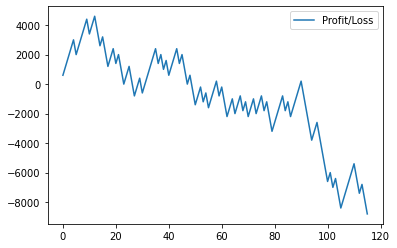

In [126]:
fpnl.cumsum().plot()

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download('SPY')
daily = df['Adj Close'].dropna()
weekly = df['Adj Close'].resample('W-FRI').last() #.tail(5)

[*********************100%***********************]  1 of 1 completed


In [13]:
wk_pct = weekly.pct_change()
wk_pct.quantile(.9)

wk_pct.describe()

count    1549.000000
mean        0.002036
std         0.024020
min        -0.197934
25%        -0.009830
50%         0.003182
75%         0.014462
max         0.132922
Name: Adj Close, dtype: float64

In [49]:
pd.cut(wk_pct, 10)

q_class = pd.qcut(wk_pct, q=10, labels=range(10)) #10 equal sized bins!
q_class

Date
1993-01-29    NaN
1993-02-05      8
1993-02-12      2
1993-02-19      1
1993-02-26      8
             ... 
2022-09-09      9
2022-09-16      0
2022-09-23      0
2022-09-30      0
2022-10-07      9
Freq: W-FRI, Name: Adj Close, Length: 1550, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

<AxesSubplot:title={'center':'Quantiles (% return / wk)'}>

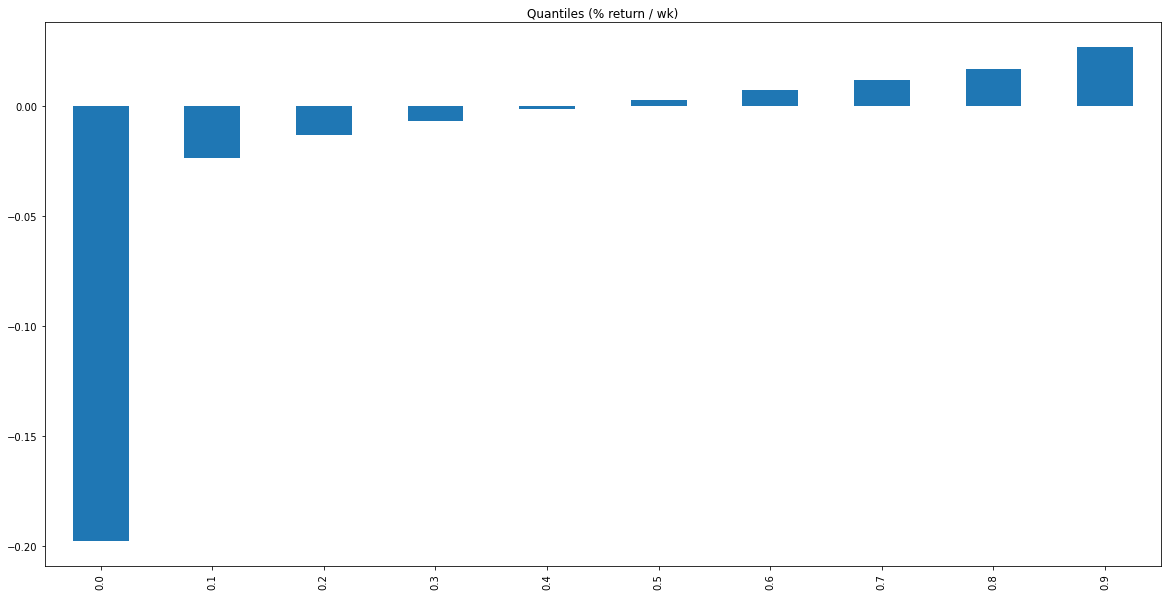

In [39]:
quantiles_10 = wk_pct.quantile([i/10 for i in range(10)])
quantiles_10.plot(kind='bar', title='Quantiles (% return / wk)', figsize=(20,10))

In [43]:
pd.cut(wk_pct, bins=10, labels=range(10)).value_counts()

6    770
5    585
7     88
4     77
3     12
8      7
9      5
2      3
0      1
1      1
Name: Adj Close, dtype: int64

<AxesSubplot:>

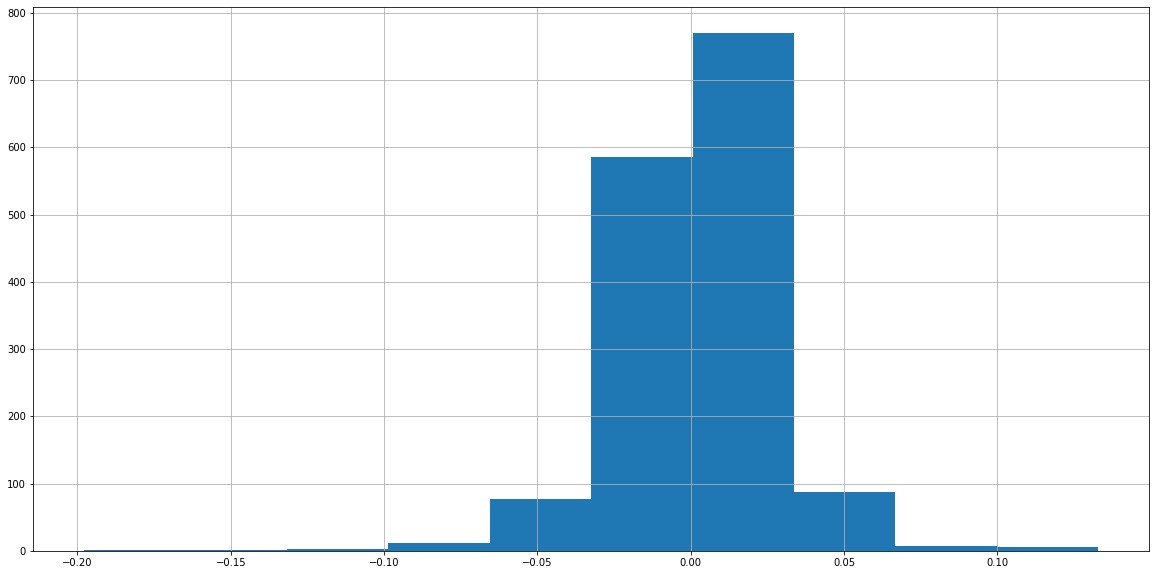

In [47]:
wk_pct.hist(figsize=(20,10), bins=10)

<AxesSubplot:>

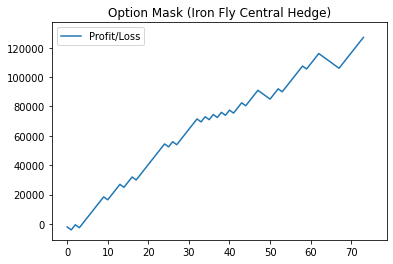

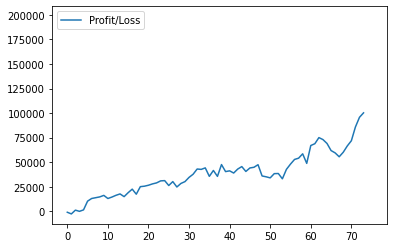

In [147]:
## Weekly mocked options:
df = pd.read_excel('C:\\Users\\zach\\Documents\\TradeStation 10.0\\Reports\\StrategyPerformance\\OPT_GC.xlsx', sheet_name='Trades List',  index_col=0)


wpnl = df['Profit/Loss']

mask = wpnl != 1.0
wpnls = wpnl[mask].reset_index().drop(columns=['#'])

orig = wpnls.copy()

win_mask = wpnls > 0
loss_mask = wpnls < 0
win_size = 700
loss_size = -400
cts = 5

wpnls[win_mask] = win_size * cts
wpnls[loss_mask] = loss_size * cts
wpnls.cumsum().plot(title='Option Mask (Iron Fly Central Hedge)')
orig.cumsum().plot()

In [85]:
df = yf.download('SPY')
daily = df[['Adj Close']].dropna()
weekly = df[['Adj Close']].resample('W-FRI').last() #.tail(5)

wk_pct.iloc[0] = 0
wk_pct

[*********************100%***********************]  1 of 1 completed


In [99]:

# wk = pd.DataFrame(wk_pct)
# wk['MA'] = wk['Adj Close'].rolling(50).mean()
wk = df.resample('W-FRI').last()
wk['MA'] = wk['Adj Close'].rolling(50).mean()

wk['LL'] = wk['Adj Close'].rolling(2).min()
wk['HH'] = wk['Adj Close'].rolling(2).max()
# wk['HW'] = wk['High']
wk['pct'] = wk['Adj Close'].pct_change()

In [106]:
wk['SE_MA'] = wk['Adj Close'].rolling(100).mean()

wk['FLAT'] = (wk['Adj Close'].shift(1) < wk.SE_MA.shift(1)) & (wk['Adj Close'].shift(1) > wk.MA.shift(1))

# for row in wk.itertuples():
#     # print(row)
#     le = row.Close > row.MA
#     # se = row.Close <
#     if not le:
#         print(row)

False    1526
True       24
Name: FLAT, dtype: int64

In [157]:
len = 50
lb = 3
wk['MA'] = wk['Adj Close'].rolling(len).mean()
wk['LE'] = wk.MA.shift(1) > wk.MA.shift(lb + 1)
wk.LE.value_counts()

wk['SE'] = wk.MA.shift(1) < wk.MA.shift(lb + 1)

mask = (wk.LE != True) & (wk.SE != True)
wk['FLAT'] = (~wk['LE'] & ~wk['SE'])

wk['abs_pct'] = wk.pct.abs()
wk.groupby(['FLAT'])['abs_pct'].mean()

FLAT
False    0.017351
True     0.008253
Name: abs_pct, dtype: float64

In [142]:
#FIND the largest difference? (in ratio)
min_flat = {}
res = {}
flats = 0
for len in range(10,250,5):
    for lb in range(1,20,1):
        wk['MA'] = wk['Adj Close'].rolling(len).mean()
        wk['LE'] = wk.MA.shift(1) > wk.MA.shift(lb + 1)
        wk.LE.value_counts()

        wk['SE'] = wk.MA.shift(1) < wk.MA.shift(lb + 1)

        mask = (wk.LE != True) & (wk.SE != True)
        wk['FLAT'] = (~wk['LE'] & ~wk['SE'])

        wk['abs_pct'] = wk.pct.abs()
        gb = wk.groupby(['FLAT'])['abs_pct'].mean()
        f, t = gb.iloc[0], gb.iloc[1]
        # print(gb, t, f) #WE want FALSE / True

        val = f / t
        res[(len, lb)] = val
        min_flat[len] = t
        # flats + t



In [143]:
res

{(10, 1): 1.4452734094026383,
 (10, 2): 1.4127630224679968,
 (10, 3): 1.2852745597776152,
 (10, 4): 1.338955007890619,
 (10, 5): 1.383310825091967,
 (10, 6): 1.4190481605799883,
 (10, 7): 1.383179786067925,
 (10, 8): 1.3960505580903906,
 (10, 9): 1.469302847403635,
 (10, 10): 1.5216361619658787,
 (10, 11): 1.557414163615707,
 (10, 12): 1.5902597948502666,
 (10, 13): 1.6516642954713516,
 (10, 14): 1.6811225612535152,
 (10, 15): 1.7193965424905349,
 (10, 16): 1.7869476088559695,
 (10, 17): 1.838052294946969,
 (10, 18): 1.8881397194069656,
 (10, 19): 1.93179125638726,
 (15, 1): 1.4190481605799883,
 (15, 2): 1.383179786067925,
 (15, 3): 1.3960505580903906,
 (15, 4): 1.469302847403635,
 (15, 5): 1.5216361619658787,
 (15, 6): 1.557414163615707,
 (15, 7): 1.5902597948502666,
 (15, 8): 1.6516642954713516,
 (15, 9): 1.6811225612535152,
 (15, 10): 1.7193965424905349,
 (15, 11): 1.7869476088559695,
 (15, 12): 1.838052294946969,
 (15, 13): 1.8881397194069656,
 (15, 14): 1.93179125638726,
 (15, 15)

In [144]:
min_flat

{10: 0.008901570465993167,
 15: 0.008607606731425462,
 20: 0.008717764335027006,
 25: 0.00882972931057503,
 30: 0.008345789234789519,
 35: 0.008454810313863635,
 40: 0.008024332461432053,
 45: 0.008401092649590228,
 50: 0.008482749652680636,
 55: 0.008701736452810598,
 60: 0.008698870716044985,
 65: 0.008803114711621809,
 70: 0.008957969157046757,
 75: 0.009534462890203,
 80: 0.00965975005123815,
 85: 0.009649652799439003,
 90: 0.009681699898134206,
 95: 0.009618647917736489,
 100: 0.009619887251849929,
 105: 0.009716575856270504,
 110: 0.009989803226431351,
 115: 0.009976525025809415,
 120: 0.00995827092603185,
 125: 0.009766607104568038,
 130: 0.009755851467789272,
 135: 0.009672763238292659,
 140: 0.010075336165401346,
 145: 0.01026053203618038,
 150: 0.01040906155433272,
 155: 0.010629213496567036,
 160: 0.010601819350554802,
 165: 0.010836956064259612,
 170: 0.010799102328135152,
 175: 0.010888977540535194,
 180: 0.011007825892102138,
 185: 0.011172149075448118,
 190: 0.0112265080

In [158]:
wk[['FLAT','abs_pct']][wk['FLAT']]

,FLAT,abs_pct
Date,,
1993-01-29,True,NaN
1993-02-05,True,0.023471
1993-02-12,True,0.008339
1993-02-19,True,0.023125
1993-02-26,True,0.019369
1993-03-05,True,0.007741
1993-03-12,True,0.007681
1993-03-19,True,0.003331
1993-03-26,True,0.002776


In [161]:
wk = wk.rename(columns={'Adj Close':'close'})
wk

,Open,High,Low,Close,close,Volume,MA,LL,HH,pct,SE_MA,FLAT,LE,SE,abs_pct
Date,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334030,1003200,NaN,NaN,NaN,NaN,NaN,True,False,False,NaN
1993-02-05,44.968750,45.062500,44.718750,44.968750,25.928637,492100,NaN,25.334030,25.928637,0.023471,NaN,True,False,False,0.023471
1993-02-12,44.875000,44.875000,44.593750,44.593750,25.712421,42500,NaN,25.712421,25.928637,-0.008339,NaN,True,False,False,0.008339
1993-02-19,43.406250,43.562500,43.343750,43.562500,25.117809,34900,NaN,25.117809,25.712421,-0.023125,NaN,True,False,False,0.023125
1993-02-26,44.437500,44.437500,44.187500,44.406250,25.604311,66200,NaN,25.117809,25.604311,0.019369,NaN,True,False,False,0.019369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,402.739990,407.510010,402.459991,406.600006,404.936584,76618100,426.314417,390.635315,404.936584,0.036610,409.627230,False,False,True,0.036610
2022-09-16,384.140015,386.250000,382.109985,385.559998,385.559998,102806100,425.470276,385.559998,404.936584,-0.047851,410.109221,False,False,True,0.047851
2022-09-23,370.579987,370.619995,363.290009,367.950012,367.950012,122210100,424.202616,367.950012,385.559998,-0.045674,410.429781,False,False,True,0.045674


In [186]:
# import btalib as bta
# # WHAT THE FUCK IS WITH THESE LIBRARIES!
#
# # wk['RSI'
#
# from btalib import rsi
#
# from ta.momentum import RSIIndicator
#
# for i in range(2,200,2):
#     rsi = RSIIndicator(wk.close, window=i)
#     break
# # rsi(wk.close, period=10)
#
#
# from ta.volatility import BollingerBands
#
# bb = BollingerBands(close=wk.close)
#
# rsi.head(5)

AttributeError: 'RSIIndicator' object has no attribute 'head'

In [230]:
# Returns RSI values
def rsi(close, periods = 14):

    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)

    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi



[*********************100%***********************]  1 of 1 completed


In [249]:
df = yf.download('SPY')
# daily = df[['Adj Close']].dropna()
weekly = df[['Adj Close']].resample('W-FRI').last() #.tail(5)

wk_pct.iloc[0] = 0
wk_pct



wk = pd.DataFrame(weekly)


wk['pct_chg'] = wk.pct_change()
wk['abs_pct'] = np.abs(wk.pct_chg)

wk = wk.rename(columns={'Adj Close':'close'})

result = {}
for i in range(5,200,5):
    for b in range(10,90,5):
        wk['RSI'] = rsi(wk.close, i)

        # wk.dropna(inplace=True)

        wk['FLAT'] = (wk['RSI'].shift(1) > b) & (wk.RSI.shift(1) < (100 - b))
        gb = wk.groupby('FLAT')['abs_pct'].mean()


        try:
            f,t = gb.iloc[0],gb.iloc[1]
            result[(i,b)] = f / t
        except:
            pass

        # break

result

[*********************100%***********************]  1 of 1 completed


{(5, 10): 0.7277409023418299,
 (5, 15): 1.010905529978031,
 (5, 20): 0.8814506529054239,
 (5, 25): 0.8952066627624068,
 (5, 30): 0.8746430977686623,
 (5, 35): 0.9130245472658958,
 (5, 40): 0.8960343162164591,
 (5, 45): 0.8281644738475514,
 (10, 10): 0.8074718904556702,
 (10, 15): 0.8134665014333212,
 (10, 20): 0.7780160377110683,
 (10, 25): 0.9681266373489794,
 (10, 30): 0.8582791011510799,
 (10, 35): 0.8711108580788046,
 (10, 40): 0.8799304971148321,
 (10, 45): 0.8633812187324751,
 (15, 10): 0.8032512600473365,
 (15, 15): 0.7605020614963124,
 (15, 20): 0.820567609196215,
 (15, 25): 0.7846618400927203,
 (15, 30): 0.8781549253338127,
 (15, 35): 0.8931783602624574,
 (15, 40): 0.830746188808767,
 (15, 45): 0.7911741457224667,
 (20, 10): 0.6420413953232567,
 (20, 15): 0.7360137564809422,
 (20, 20): 0.6925684345587501,
 (20, 25): 0.7334506439329543,
 (20, 30): 0.8610758431684982,
 (20, 35): 0.8542115587645224,
 (20, 40): 0.8293860599347713,
 (20, 45): 0.7831430244604067,
 (25, 10): 0.559577

In [270]:
from ta.volatility import BollingerBands

def get_weekly_data(symbol):
    df = yf.download('SPY')
    # daily = df[['Adj Close']].dropna()
    weekly = df[['Adj Close']].resample('W-FRI').last() #.tail(5)
    wk = pd.DataFrame(weekly)


    wk['pct_chg'] = wk.pct_change()
    wk['abs_pct'] = np.abs(wk.pct_chg)

    wk = wk.rename(columns={'Adj Close':'close'})
    return wk

results = {}
largest_ratio = 0
largest_true, largest_false = 0,0
for i in np.arange(.25,3,.25):
    # print(i)
    for l in range(5,50,5):

        r = BollingerBands(wk.close, window=l, window_dev=i)
        wk['UP'] = r.bollinger_hband()
        wk['DN'] = r.bollinger_lband()
        wk['ABOVE'] = wk.close.shift(1) > wk.UP.shift(1)
        wk['BELOW'] = wk.close.shift(1) < wk.DN.shift(1)

        mask = (wk.ABOVE) | (wk.BELOW)
        wk['OUTSIDE'] = mask

        # wk.dropna(inplace=True)

        gb = wk.groupby('OUTSIDE')['abs_pct'].mean()
        # print(gb)

        if gb.shape[0] == 1: continue
        a,b = gb.iloc[0], gb.iloc[1]
        f,t = a,b
        if l == 5 and i == .25:
            print(gb, a, b)

        largest_true = max(b, largest_true)
        largest_false = max(a, largest_false)

        largest_ratio = max(a/b, largest_ratio)

        count = wk.OUTSIDE.value_counts()
        tc, fc = count
        # print(fc/tc)

        results[(round(i,2),l)] = [round(a/b,2), round(fc/tc,2)]


print(f'FORMAT -- (STDs, Length): [Inside Avg / Outside Avg, Outside Ct / Inside Ct]')
print(largest_true, largest_false, largest_ratio)
results

OUTSIDE
False    0.018545
True     0.016899
Name: abs_pct, dtype: float64 0.01854508202556861 0.016898524480011994
FORMAT -- (STDs, Length): [Inside Avg / Outside Avg, Outside Ct / Inside Ct]
0.07374408930813744 0.019854554527038704 1.1872294744874128


{(0.25, 5): [1.1, 0.1],
 (0.25, 10): [1.19, 0.11],
 (0.25, 15): [1.07, 0.11],
 (0.25, 20): [1.01, 0.1],
 (0.25, 25): [1.06, 0.11],
 (0.25, 30): [0.96, 0.1],
 (0.25, 35): [1.06, 0.1],
 (0.25, 40): [1.1, 0.11],
 (0.25, 45): [1.04, 0.1],
 (0.5, 5): [1.12, 0.2],
 (0.5, 10): [1.14, 0.24],
 (0.5, 15): [1.07, 0.23],
 (0.5, 20): [1.04, 0.22],
 (0.5, 25): [1.09, 0.21],
 (0.5, 30): [1.14, 0.21],
 (0.5, 35): [1.15, 0.2],
 (0.5, 40): [1.16, 0.19],
 (0.5, 45): [1.16, 0.18],
 (0.75, 5): [1.18, 0.38],
 (0.75, 10): [1.12, 0.38],
 (0.75, 15): [1.08, 0.38],
 (0.75, 20): [1.09, 0.36],
 (0.75, 25): [1.05, 0.36],
 (0.75, 30): [1.12, 0.36],
 (0.75, 35): [1.18, 0.33],
 (0.75, 40): [1.19, 0.31],
 (0.75, 45): [1.15, 0.29],
 (1.0, 5): [1.14, 0.73],
 (1.0, 10): [1.07, 0.65],
 (1.0, 15): [1.07, 0.61],
 (1.0, 20): [1.11, 0.61],
 (1.0, 25): [1.16, 0.59],
 (1.0, 30): [1.14, 0.54],
 (1.0, 35): [1.12, 0.53],
 (1.0, 40): [1.11, 0.51],
 (1.0, 45): [1.16, 0.48],
 (1.25, 5): [1.07, 0.73],
 (1.25, 10): [1.09, 0.85],
 (1.25

In [272]:
pd.DataFrame(results, index=['InAvg / OutAvg','OutCt/InCt'])

0.25                                                  0.50  \
                 5     10    15    20    25    30    35    40    45    5    
InAvg / OutAvg  1.1  1.19  1.07  1.01  1.06  0.96  1.06  1.10  1.04  1.12   
OutCt/InCt      0.1  0.11  0.11  0.10  0.11  0.10  0.10  0.11  0.10  0.20   

                ...  2.50              2.75                                \
                ...    35    40    45    15    20    25    30    35    40   
InAvg / OutAvg  ...  0.58  0.49  0.49  0.23  0.33  0.51  0.30  0.33  0.33   
OutCt/InCt      ...  0.03  0.03  0.03  0.01  0.01  0.01  0.01  0.01  0.01   

                      
                  45  
InAvg / OutAvg  0.31  
OutCt/InCt      0.01  

[2 rows x 94 columns]

In [291]:

def get_weekly_OHLC(symbol='SPY'):
    df = yf.download(symbol)
    df = df.resample('W-FRI').agg({
        'Open':'first',
        'High':'max',
        'Low':'min',
        'Close':'last',
        'Volume':'sum',
    })
    return df

wdf = get_weekly_OHLC()
wdf

import btalib
import ta
# tdf = ta.add_all_ta_features(wdf, wdf.Open,wdf.High, wdf.Low, wdf.Close, wdf.Volume)
tdf = ta.add_all_ta_features(wdf, 'Open','High','Low', 'Close', 'Volume')

[*********************100%***********************]  1 of 1 completed


c:\users\zach\pycharmprojects\mlresearch\fucktf2\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\users\zach\pycharmprojects\mlresearch\fucktf2\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [295]:
tdf = tdf.dropna(axis=1, how='all')
# tdf = tdf.dropna(axis=0, how='any') #Why still dropping everything?
tdf['trend_psar_up'].fillna(0, inplace=True)
tdf['trend_psar_down'].fillna(0, inplace=True)
tdf.dropna(inplace=True)

In [297]:
## TRAIN test SPLIT

tdf['fut_pct_chg'] = df.Close.pct_change().shift(-1)
tdf.dropna(inplace=True)

In [303]:
size = tdf.shape[0]
train = int(size * .8)
test = size - train
train, test, train + test


y = tdf['fut_pct_chg']
x = tdf.drop(columns='fut_pct_chg')
x_train, x_test = x.iloc[:train], x.iloc[train:]
y_train, y_test = y.iloc[:train], y.iloc[train:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1142, 91), (286, 91), (1142,), (286,))

In [337]:
##  SCALE + PCA : )

N_COMPS = 5

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_scaler = StandardScaler().fit(x_train)
test_scaler = StandardScaler().fit(x_test)

x_train = train_scaler.transform(x_train)
x_test = test_scaler.fit_transform(x_test)


## ---------------------- PCA --------------------

pca = PCA(n_components=N_COMPS)
xtr = pca.fit_transform(x_train)
xtst = pca.fit_transform(x_test)


In [321]:
## SET up the categories for Y !!
AVOID_N = 2


q_class = pd.qcut(y, q=10, labels=range(10)) #10 equal sized bins!
q_class

avoid_n = AVOID_N
mask = (q_class > avoid_n) & (q_class < 10 - avoid_n) #THIS is saying we are INSIDE 2 and 8... MASK means INSIDE
q_class[~mask] = 0
q_class[mask] = 1
q_class, q_class.value_counts()

(Date
 1994-06-10    1
 1994-06-17    0
 1994-06-24    0
 1994-07-01    1
 1994-07-08    0
              ..
 2022-09-02    0
 2022-09-09    0
 2022-09-16    0
 2022-09-23    0
 2022-09-30    0
 Name: fut_pct_chg, Length: 1428, dtype: category
 Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9],
 0    715
 1    713
 2      0
 3      0
 4      0
 5      0
 6      0
 7      0
 8      0
 9      0
 Name: fut_pct_chg, dtype: int64)

In [338]:
ytr, ytst = q_class.iloc[:train], q_class.iloc[train:]
ytr.shape, ytst.shape, xtr.shape, xtst.shape

((1142,), (286,), (1142, 5), (286, 5))

In [331]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtr, ytr)
lr.predict(xtst[0:1]) #Works, makes predictions.

array([1], dtype=int64)

In [336]:
print('Acc:',lr.score(xtst, ytst))

from sklearn.metrics import f1_score, accuracy_score, precision_score

print('Precision: ', precision_score(ytst, lr.predict(xtst)))
print('F1: ', f1_score(ytst, lr.predict(xtst)))

Acc: 0.5804195804195804
Precision:  0.5833333333333334
F1:  0.6026490066225165


In [353]:
##  SCALE + PCA : )

N_COMPS = 1 #single fucking component? Really... 20 also works well, but 1 is interesting...

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_scaler = StandardScaler().fit(x_train)
test_scaler = StandardScaler().fit(x_test)

x_train = train_scaler.transform(x_train)
x_test = test_scaler.fit_transform(x_test)


## ---------------------- PCA --------------------

pca = PCA(n_components=N_COMPS)
xtr = pca.fit_transform(x_train)
xtst = pca.fit_transform(x_test)


lr = LogisticRegression()
lr.fit(xtr, ytr)
# lr.predict(xtst[0:1]) #Works, makes predictions.
lr.score(xtst, ytst)

print('Precision: ', precision_score(ytst, lr.predict(xtst)))
print('F1: ', f1_score(ytst, lr.predict(xtst)))

Precision:  0.6153846153846154
F1:  0.6089965397923875


In [372]:
## --------------------- RFC

##  SCALE + PCA : )

N_COMPS = 80 #single fucking component? Really... 20 also works well, but 1 is interesting...

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_scaler = StandardScaler().fit(x_train)
test_scaler = StandardScaler().fit(x_test)

x_train = train_scaler.transform(x_train)
x_test = test_scaler.fit_transform(x_test)


## ---------------------- PCA --------------------

pca = PCA(n_components=N_COMPS)
xtr = pca.fit_transform(x_train)
xtst = pca.fit_transform(x_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(xtr, ytr)
clf.score(xtst, ytst) #Yikes... PCA does NOT seem to help here...

0.5769230769230769

In [403]:
clf.fit(x_train, ytr)
clf.score(x_test, ytst) #BAM -- NO PCA !!

0.6573426573426573

<AxesSubplot:title={'center':'Test Set (Approxed into Option Trades)'}, xlabel='Date'>

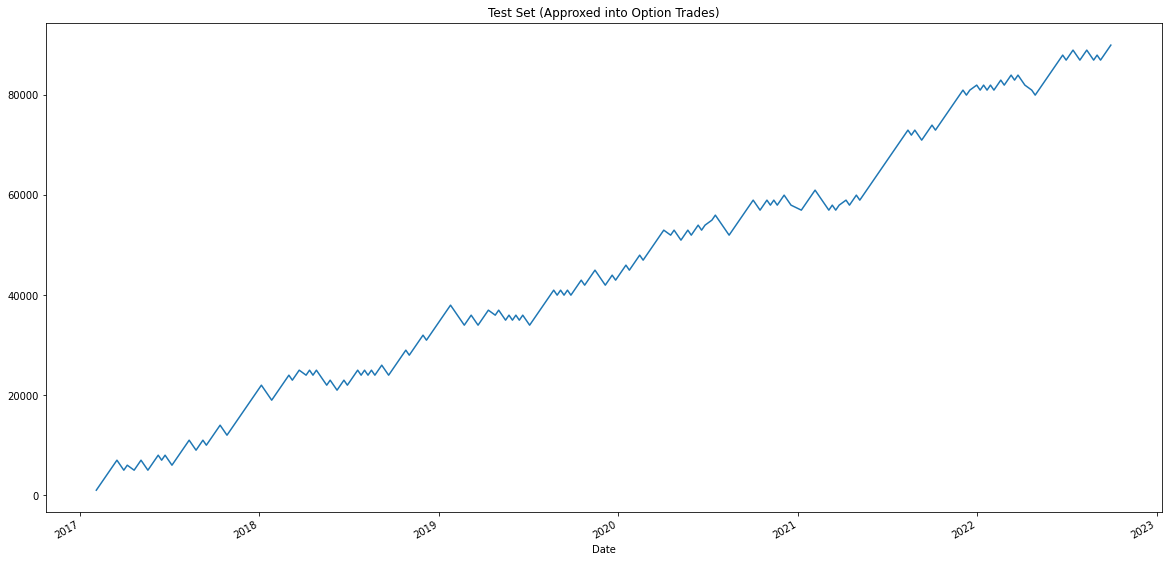

In [472]:
rfc_preds = clf.predict(x_test)
compared = rfc_preds + np.array(ytst) #We want 2's, True Positives, or 0's True Negatives.



import matplotlib.pyplot as plt
# fig,ax = plt.subplots()
# ax.plot(rfc_preds)
# ax.plot(ytst)

tp_and_tn = (compared == 2) | (compared == 0)
compared[tp_and_tn]

compared_df = pd.DataFrame({'y_pred':rfc_preds, 'y':ytst})
compared_df['pass'] = compared_df.y_pred == compared_df.y

# PLAY with this... 1:1 could be a narrow IC, or the average straddle / strangle possibly?
win_size = 1000
loss_size = -1000

compared_df['pnl'] = np.where(compared_df['pass'] == True, win_size, loss_size)
compared_df.pnl.cumsum().plot(figsize=(20,10), title='Test Set (Approxed into Option Trades)')

# ax = plt.subplot()
# compared_df['io'] = np.where(compared_df['pass'] == True, 1,0)
# compared_df.io.plot(figsize=(20,10), kind='area', title='Accurate Predictions', ax=ax)

<AxesSubplot:title={'center':'Accurate Predictions'}, xlabel='Date'>

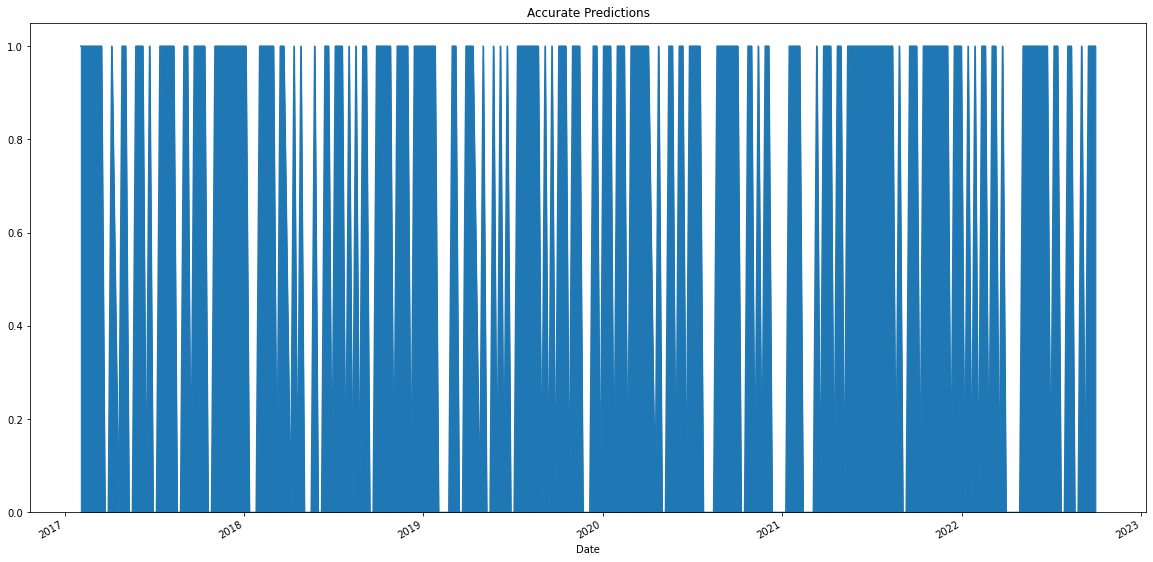

In [475]:
compared_df['io'] = np.where(compared_df['pass'] == True, 1,0)
compared_df.io.plot(figsize=(20,10), kind='area', title='Accurate Predictions')


<AxesSubplot:title={'center':'Accurate Predictions'}, xlabel='Date'>

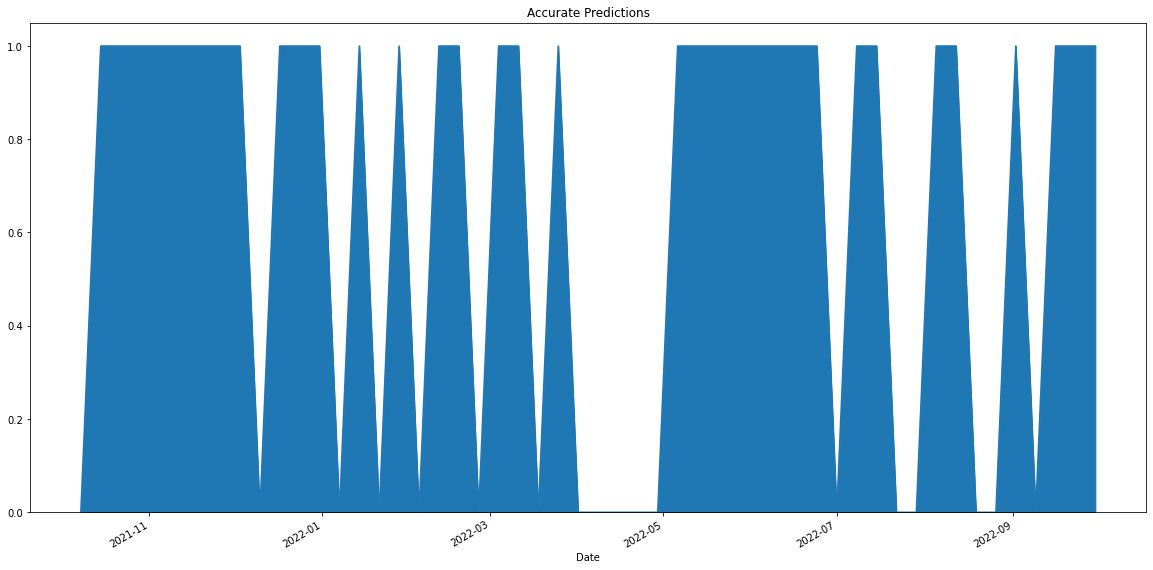

In [478]:
compared_df['io'] = np.where(compared_df['pass'] == True, 1,0)
compared_df.io.tail(50).plot(figsize=(20,10), kind='area', title='Accurate Predictions')

In [452]:
eq = compared_df.pnl.cumsum()
_max = 0
dd, mdd = 0,0
for e in eq:
    _max = max(e, _max)
    dd = _max - e
    # print(dd)
    mdd = max(dd, mdd)

print('Calmar: ', eq[-1] / 5 / mdd)
print('SR    : ', eq.mean() / eq.std())

Calmar:  4.5
SR    :  1.804600321252188


## -------------------- Details about Class (Quartile) ------------------------

In [398]:
range = pd.qcut(y, q=10).value_counts().sort_index().index #, labels=range(10)) #10 equal sized bins!

print('Approx half a percent -- at 58 - 60% ? Not bad...')
range[2], range[10 - 2] #NOT inclusing of these INSIDE of these bounds!

Approx half a percent -- at 58 - 60% ? Not bad...


(Interval(-0.00638, -0.00309, closed='right'),
 Interval(0.00754, 0.0126, closed='right'))

In [488]:
print('ALL\n',pd.qcut(y, q=10).value_counts().sort_index())
print('\nINSIDE\n',pd.qcut(y, q=10).value_counts().sort_index().iloc[2:-3])

ALL
 (-0.11, -0.0122]        143
(-0.0122, -0.00638]     143
(-0.00638, -0.00309]    143
(-0.00309, -0.00102]    142
(-0.00102, 0.000522]    143
(0.000522, 0.00243]     143
(0.00243, 0.00492]      142
(0.00492, 0.00754]      143
(0.00754, 0.0126]       143
(0.0126, 0.145]         143
Name: fut_pct_chg, dtype: int64

INSIDE
 (-0.00638, -0.00309]    143
(-0.00309, -0.00102]    142
(-0.00102, 0.000522]    143
(0.000522, 0.00243]     143
(0.00243, 0.00492]      142
Name: fut_pct_chg, dtype: int64


## -------------------------------- Custom Feature Set --------------------------------------

In [506]:
## ------------------------ LARGER feature set -----------------------------

from zo.PipelineHelpers import add_price_features, add_vol_features, add_zs_features

df = get_weekly_OHLC('SPY')

df = df.rename(columns={'Close':'close','Open':'open','High':'high', 'Low': 'low' })
df = add_price_features(df)
df = add_zs_features(df)

[*********************100%***********************]  1 of 1 completed


In [507]:
df['fut_pct_chg'] = df.close.pct_change().shift(-1)
df = df.dropna()

In [513]:
y = df['fut_pct_chg']
x = df.drop(columns=['fut_pct_chg'])

# ------------------------------ Make into Categorical -------------------------------

AVOID_N = 2


q_class = pd.qcut(y, q=10, labels=[0,1,2,3,4,5,6,7,8,9]) #10 equal sized bins!
q_class

avoid_n = AVOID_N
mask = (q_class > avoid_n) & (q_class < 10 - avoid_n) #THIS is saying we are INSIDE 2 and 8... MASK means INSIDE
q_class[~mask] = 0
q_class[mask] = 1
q_class, q_class.value_counts()

## ---------------- SPLIT ------------- ##

size = df.shape[0]
train = int(size * .8)
test = size - train
print('Split Sizes', train, test, train + test)


y = q_class #tdf['fut_pct_chg']
# x = df.drop(columns='fut_pct_chg')

print('Whole Shapes', x.shape, y.shape)

x_train, x_test = x.iloc[:train], x.iloc[train:]
y_train, y_test = y.iloc[:train], y.iloc[train:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Split Sizes 1199 300 1499
Whole Shapes (1499, 29) (1499,)


((1199, 29), (300, 29), (1199,), (300,))

In [528]:
# --------------------- SCALE -------------------------

N_COMPS = 10 #Max of I think 29 here? yeah ^^ 29

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_scaler = StandardScaler().fit(x_train)
test_scaler = StandardScaler().fit(x_test)

x_train = train_scaler.transform(x_train)
x_test = test_scaler.fit_transform(x_test)


# --------------------- PCA (Optional) ----------------------

pca = PCA(n_components=N_COMPS)
xtr = pca.fit_transform(x_train)
xtst = pca.fit_transform(x_test)


# ----------------- MODELS --------------------

import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
boost_score = clf.score(x_test, y_test) #Eh...
print('Boost Score: ', boost_score)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_score_npca = rfc.score(x_test, y_test) # 58, better... slightly.
print(f'RFC Score (NO PCA): {rfc_score_npca}')

rfc.fit(xtr, y_train)
print(f'RFC Score (PCA)', rfc.score(xtst, y_test))

rfc.feature_importances_ #Fairly even accross the board

Boost Score:  0.5533333333333333
RFC Score (NO PCA): 0.6233333333333333
RFC Score (PCA) 0.5933333333333334


array([0.10855237, 0.11951932, 0.09619067, 0.09781057, 0.10294984,
       0.09033375, 0.09654049, 0.10202024, 0.08936912, 0.09671363])